---
<a id="sumary"></a>

**Sumário**
1. [Pacotes necessários](#packages)<br>
2. [Exemplo de como exportar e importar dados usando `pandas`](#ex_pd) <br>
3. [Exemplo de como exportar uma figura usando o `matplotlib.pyplot`](#ex_plt)

---
<a href="#sumary">De volta para o Sumário</a>
<a id="packages"></a>
# Pacotes necessários

In [2]:
# pacotes básicos para os exemplos
import pandas as pd             # estruturar dados
import matplotlib.pyplot as plt # confeccionar figuras

# esses pacotes são usados para importar e exportar arquivos no Google Colab
import io                      # input output functions
from google.colab import files # só funciona no Google Colab

---
<a href="#sumary">De volta para o Sumário</a>
<a id="ex_pd"></a>
# Exemplo de como exportar e importar dados usando `pandas`

Vamos criar um `pd.DataFrame` para exemplifcar como exportar arquivos do tipo `.csv`, `.tsv`, `.dat`, `.txt` etc.

In [24]:
lista_de_tempos = range(0,100,5)

dicionario_com_dados = {
    'tempo'  : [t for t in lista_de_tempos],
    'posicao': [5 + 1.3*t + 2.2*t**2 for t in lista_de_tempos]
}
dicionario_com_dados

{'tempo': [0,
  5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95],
 'posicao': [5.0,
  66.5,
  238.00000000000003,
  519.5,
  911.0000000000001,
  1412.5,
  2024.0000000000002,
  2745.5,
  3577.0000000000005,
  4518.5,
  5570.0,
  6731.500000000001,
  8003.000000000001,
  9384.5,
  10876.0,
  12477.500000000002,
  14189.000000000002,
  16010.500000000002,
  17942.0,
  19983.5]}

In [25]:
df_dados = pd.DataFrame(dicionario_com_dados)
df_dados.head()

,tempo,posicao
0,0,5.0
1,5,66.5
2,10,238.0
3,15,519.5
4,20,911.0


Para salvar um arquivo, primeiramente usamos a função `to_csv()` do pandas normalmente fornecendo o nome do arquivo e o tipo de extensão que queremos para o arquivo:

In [6]:
nome_do_arquivo = 'data_ex_google_colab.csv'
df_dados.to_csv(nome_do_arquivo)

Observe que ao executar a célula acima, nenhuma mensagem é retornada, como se o arquvo tivesse sido exportado normalmente. Contudo, vemos que isso não aconteceu. Depois de executar essa célula, precisamos fazer o `download` do arquivo usando a função `files.download()` fornecendo como argumento o mesmo nome de arquivo que supostamente deveria ter sido gerado:

In [ ]:
files.download(nome_do_arquivo)

Após executar essa célula você irá observar uma barra de download e seu arquivo então será baixado.

Para `importar` um arquivo e usar no `pandas`, precisamos primeiramente usar a função `files.upload()` e guardar seu valor em uma variável. Isso fará com que o arquivo fique, de certa forma, guardado nessa variável. Uma vez que a célula a seguir é executada, você verá uma célula com um botão escrito `Choose Files`. Clique nesse botão e selecione o arquivo que deseja importar.

In [ ]:
arquivo_importado = files.upload()

Para fazer a leitura desse arquivo usando o `pandas`, temos que executar a seguinte linha de comando:

In [ ]:
nome_do_arquivo = 'data_ex_google_colab.csv'
df = pd.read_csv(io.BytesIO(arquivo_importado[nome_do_arquivo]))
df

Você deve ver o `pd.DataFrame` gerado a partir do arquivo importado.

---
<a href="#sumary">De volta para o Sumário</a>
<a id="ex_plt"></a>
# Exemplo de como exportar uma figura usando `matplotlib.pyplot`

Vamos usar os dados do `df_dados` para confeccionar um gráfico e exportar a figura gerada.

Text(0.5, 1.0, 'Posicão do móvel versus tempo.')

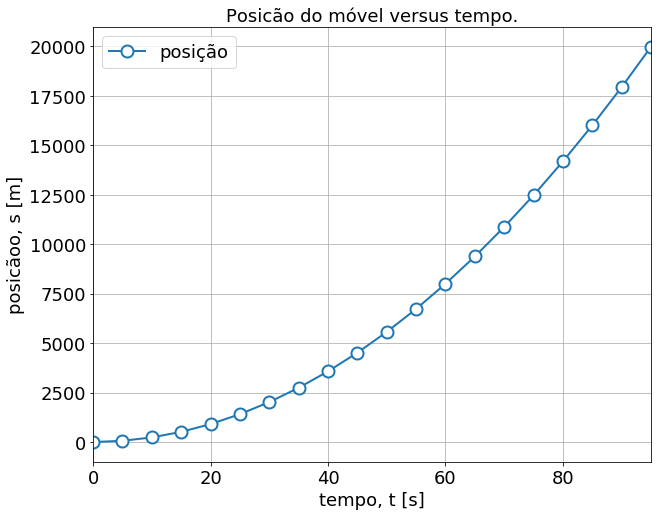

In [29]:
FONT_SIZE = 18 # tamanho para as fontes do gráfico

grafico = df_dados.plot(
    x='tempo',                 # variável independente
    y='posicao',               # variável dependente
    figsize=(10,8),            # tamanho da figura
    marker='o',                # tipo do marcador
    markersize=12,             # tamanho do marcador
    markeredgewidth=2,         # espesurra da borda do marcador
    markerfacecolor="#FFFFFF", # cor da face do marcador
    lw=2,                      # espessura da linha
    fontsize=FONT_SIZE,        # tamanho das fontes
    grid=True                  # desenha o grid no fundo
)

# especifica os textos nos labels
grafico.set_ylabel('posicãoo, s [m]', fontsize=FONT_SIZE) # y - vertical
grafico.set_xlabel('tempo, t [s]'  , fontsize=FONT_SIZE)  # x - horizontal

# especifica a legenda
grafico.legend(['posição'], fontsize=FONT_SIZE)

# especifica o título
grafico.set_title('Posicão do móvel versus tempo.', fontsize=FONT_SIZE)

# nome para o arquivo da figura
fig_name = 'fig_ex_google_colab.pdf'

# salvamos o gráfico normalmente
plt.savefig(fig_name, dpi=120, bbox_inches='tight') # .pdf
files.download(fig_name) # faz o download da figura gerada no arquivo `fig_name`